c:\Users\Bhanu Praneeth G\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9401 - loss: 0.4673 - val_accuracy: 0.7282 - val_loss: 0.5994
Epoch 2/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - accuracy: 0.9462 - loss: 0.1669 - val_accuracy: 0.4976 - val_loss: 0.7516
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.9159 - loss: 0.2908 - val_accuracy: 0.9383 - val_loss: 0.2040
Epoch 4/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.9545 - loss: 0.1848 - val_accuracy: 0.9320 - val_loss: 0.1781
Epoch 5/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - accuracy: 0.9460 - loss: 0.1435 - val_accuracy: 0.9458 - val_loss: 0.1171
Epoch 6/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.9466 - loss: 0.1401 - val_accuracy: 0.9459 - val_loss: 0.1155
Epoch 7/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.9409 - loss: 0.1683 - val_accuracy: 0.9611 - val_loss: 0.0908
Epoch 8/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.9454 - loss: 0.1353 -

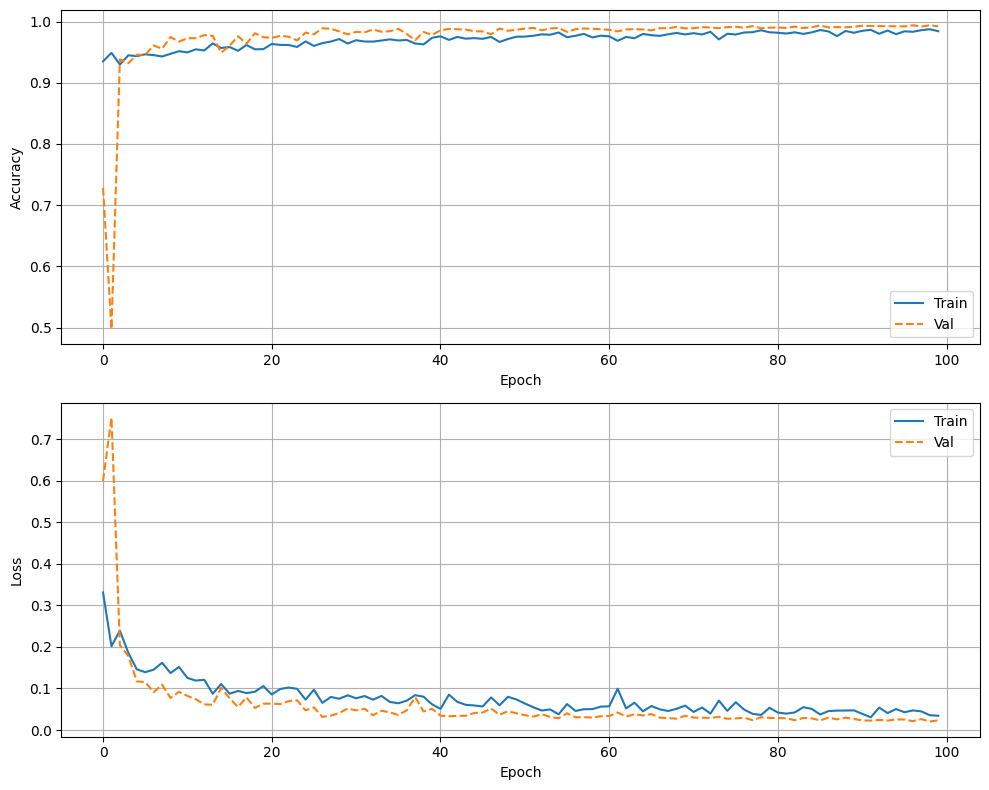

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('creditcard.csv')  # Adjust path as needed

# Prepare features and labels
X = df.drop('Class', axis=1).values
y = df['Class'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape to 3D for Conv1D input (samples, timesteps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Compute class weights to handle imbalance
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

# Define 14-layer CNN architecture
model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.2),

    Conv1D(64, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Flatten(),

    Dense(100, activation='relu'),
    Dropout(0.5),

    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with class weights
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=2048,
    validation_data=(X_test, y_test),
    class_weight=class_weights_dict,
    verbose=1
)

# Final training and validation accuracy
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\nFinal Training Accuracy:   {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

# Evaluate on test data
loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy (evaluate):  {test_accuracy:.4f}")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

# Accuracy plot
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Train', linestyle='-')
plt.plot(history.history['val_accuracy'], label='Val', linestyle='--')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Train', linestyle='-')
plt.plot(history.history['val_loss'], label='Val', linestyle='--')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



Epoch 1/100


c:\Users\punna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.8369 - loss: 0.4518 - val_accuracy: 0.9568 - val_loss: 0.3637
Epoch 2/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.9487 - loss: 0.1830 - val_accuracy: 0.9288 - val_loss: 0.3582
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9491 - loss: 0.1706 - val_accuracy: 0.9637 - val_loss: 0.1609
Epoch 4/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9324 - loss: 0.2274 - val_accuracy: 0.9711 - val_loss: 0.1332
Epoch 5/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9423 - loss: 0.1823 - val_accuracy: 0.9661 - val_loss: 0.1099
Epoch 6/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9559 - loss: 0.1838 - val_accuracy: 0.9673 - val_loss: 0.1273
Epoch 7/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9496 - loss: 0.1675 - val_accuracy: 0.9785 - val_loss: 0.0853
Epoch 8/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9537 - loss: 0.1535 - val_accuracy

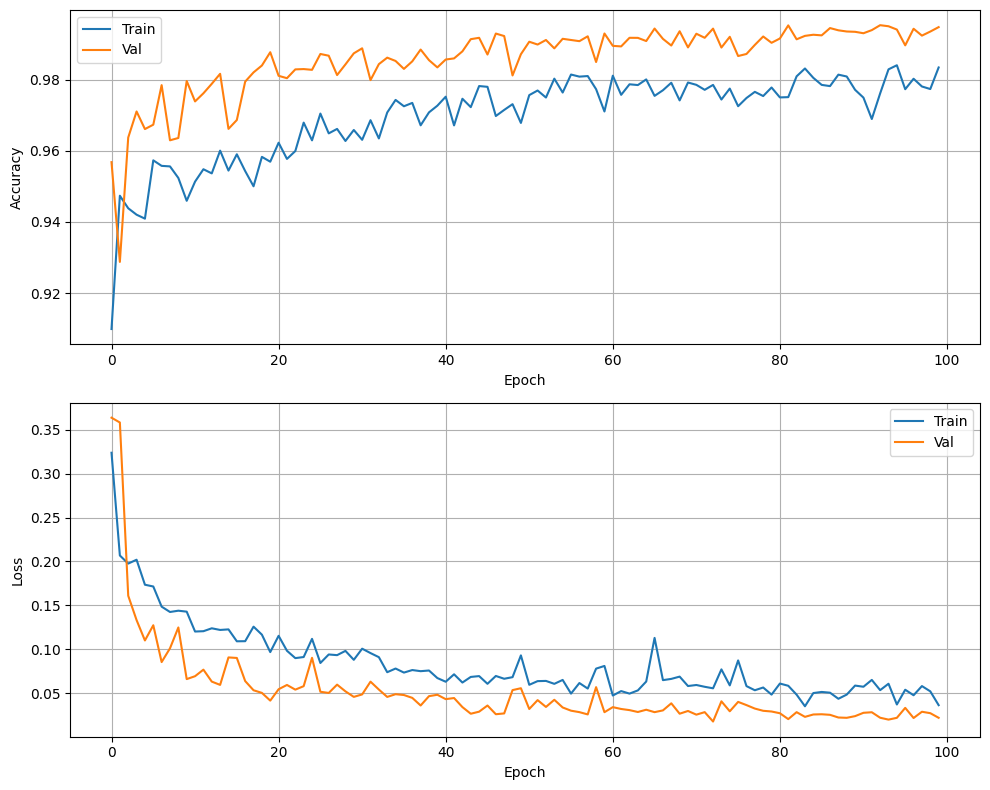

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('creditcard.csv')  # Replace with actual path if needed

# Features and labels
X = df.drop('Class', axis=1).values
y = df['Class'].values

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for Conv1D
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

# Model definition based on your architecture
model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),  # 1
    BatchNormalization(),                                                             # 2
    Dropout(0.2),                                                                      # 3

    Conv1D(64, kernel_size=2, activation='relu'),                                      # 4
    BatchNormalization(),                                                             # 5
    Dropout(0.5),                                                                      # 6

    Flatten(),                                                                         # 7
    Dense(64, activation='relu'),                                                     # 8
    Dropout(0.5),                                                                      # 9

    Dense(100, activation='relu'),                                                    # 10
    Dense(50, activation='relu'),                                                     # 11
    Dense(25, activation='relu'),                                                     # 12
    Dense(1, activation='sigmoid')                                                    # 13
])

# Compile
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=2048,
    validation_data=(X_test, y_test),
    class_weight=class_weights_dict,
    verbose=1
)

# Final Accuracy
print(f"\nFinal Training Accuracy:   {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")

# Evaluate
loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy (evaluate):  {test_accuracy:.4f}")

# Plot
plt.figure(figsize=(10, 8))

# Accuracy plot
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import precision_score, recall_score, average_precision_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Prepare features and labels
X = df.drop('Class', axis=1).values
y = df['Class'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

# Define the CNN model
model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.2),

    Conv1D(64, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Flatten(),

    Dense(100, activation='relu'),
    Dropout(0.5),

    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callback to store custom metrics
class MetricsCallback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.precisions = []
        self.recalls = []
        self.prcs = []

    def on_epoch_end(self, epoch, logs=None):
        y_pred_probs = self.model.predict(X_test, verbose=0)
        y_pred = (y_pred_probs > 0.5).astype(int).flatten()

        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        prc = average_precision_score(y_test, y_pred_probs)

        self.precisions.append(prec)
        self.recalls.append(rec)
        self.prcs.append(prc)

metrics_cb = MetricsCallback()

# Train the model for 35 epochs
history = model.fit(
    X_train, y_train,
    epochs=35,
    batch_size=2048,
    validation_data=(X_test, y_test),
    class_weight=class_weights_dict,
    callbacks=[metrics_cb],
    verbose=1
)

# Plot 1: Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: PRC (AUC)
plt.figure(figsize=(10, 6))
plt.plot(metrics_cb.prcs, label='PRC (AUC)')
plt.title('PRC (AUC) vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('PRC Score')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Precision
plt.figure(figsize=(10, 6))
plt.plot(metrics_cb.precisions, label='Precision')
plt.title('Precision vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

# Plot 4: Recall
plt.figure(figsize=(10, 6))
plt.plot(metrics_cb.recalls, label='Recall')
plt.title('Recall vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Dropout, Flatten, Dense, ReLU
from tensorflow.keras.optimizers import Adam

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Separate features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for Conv2D input: (samples, height, width, channels)
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the 14-layer CNN model
model = Sequential()

# 1. Conv2D layer with kernel size (2,2), 32 filters + ReLU
model.add(Conv2D(32, (2, 2), input_shape=(X_train.shape[1], 1, 1)))
model.add(ReLU())                             # 2. ReLU
model.add(BatchNormalization())              # 3. BatchNorm
model.add(Dropout(0.2))                       # 4. Dropout

# 5. Conv2D layer with kernel size (2,2), 64 filters + ReLU
model.add(Conv2D(64, (2, 2)))
model.add(ReLU())                             # 6. ReLU
model.add(BatchNormalization())              # 7. BatchNorm
model.add(Dropout(0.5))                       # 8. Dropout

# 9. Flatten layer
model.add(Flatten())

# 10. Dense layer + ReLU
model.add(Dense(64))
model.add(ReLU())                             # 11. ReLU
model.add(Dropout(0.5))                       # 12. Dropout

# 13. Dense layers
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))

# 14. Final classification layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=2048,
                    validation_data=(X_test, y_test), verbose=1)




# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Print train accuracy
train_accuracy = history.history['accuracy'][-1]
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
import matplotlib.pyplot as plt

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Print train accuracy
train_accuracy = history.history['accuracy'][-1]
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

# Plotting Accuracy and Loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, Flatten, Dense, ReLU
from tensorflow.keras.optimizers import Adam

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Separate features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for Conv2D input: (samples, height, width, channels)
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Compute class weights to handle imbalance
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

# Build the 14-layer CNN model
model = Sequential()

# 1. Conv2D layer with kernel size (2,2), 32 filters + ReLU
model.add(Conv2D(32, (2, 2), input_shape=(X_train.shape[1], 1, 1)))
model.add(ReLU())                             # 2. ReLU
model.add(BatchNormalization())              # 3. BatchNorm
model.add(Dropout(0.2))                       # 4. Dropout

# 5. Conv2D layer with kernel size (2,2), 64 filters + ReLU
model.add(Conv2D(64, (2, 2)))
model.add(ReLU())                             # 6. ReLU
model.add(BatchNormalization())              # 7. BatchNorm
model.add(Dropout(0.5))                       # 8. Dropout

# 9. Flatten layer
model.add(Flatten())

# 10. Dense layer + ReLU
model.add(Dense(64))
model.add(ReLU())                             # 11. ReLU
model.add(Dropout(0.5))                       # 12. Dropout

# 13. Dense layers
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))

# 14. Final classification layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with class weights
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test, y_test),
    class_weight=class_weights_dict,
    verbose=1
)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")
print(f"Final Training Accuracy: {history.history['accuracy'][-1] * 100:.2f}%")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1] * 100:.2f}%")

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


c:\Users\punna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Computed output size would be negative. Received `inputs shape=(None, 29, 0, 32)`, `kernel shape=(2, 2, 32, 64)`, `dilation_rate=[1 1]`.

Epoch 1/35


c:\Users\punna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 23s 193ms/step - accuracy: 0.8416 - loss: 0.5809 - val_accuracy: 0.9162 - val_loss: 0.4574
Epoch 2/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 28s 247ms/step - accuracy: 0.9309 - loss: 0.2152 - val_accuracy: 0.8529 - val_loss: 0.4364
Epoch 3/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 14s 124ms/step - accuracy: 0.9478 - loss: 0.1523 - val_accuracy: 0.7993 - val_loss: 0.4356
Epoch 4/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 14s 126ms/step - accuracy: 0.9261 - loss: 0.2622 - val_accuracy: 0.9563 - val_loss: 0.1555
Epoch 5/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 14s 127ms/step - accuracy: 0.9464 - loss: 0.1469 - val_accuracy: 0.9655 - val_loss: 0.1138
Epoch 6/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 14s 126ms/step - accuracy: 0.9507 - loss: 0.1439 - val_accuracy: 0.9679 - val_loss: 0.0961
Epoch 7/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 14s 127ms/step - accuracy: 0.9583 - loss: 0.1302 - val_accuracy: 0.9736 - val_loss: 0.0801
Epoch 8/35
112/112 ━━━━━━━━━━━━━━━━━━━━ 14s 127ms/step - accuracy: 0.9582 - loss: 0.1242 - val

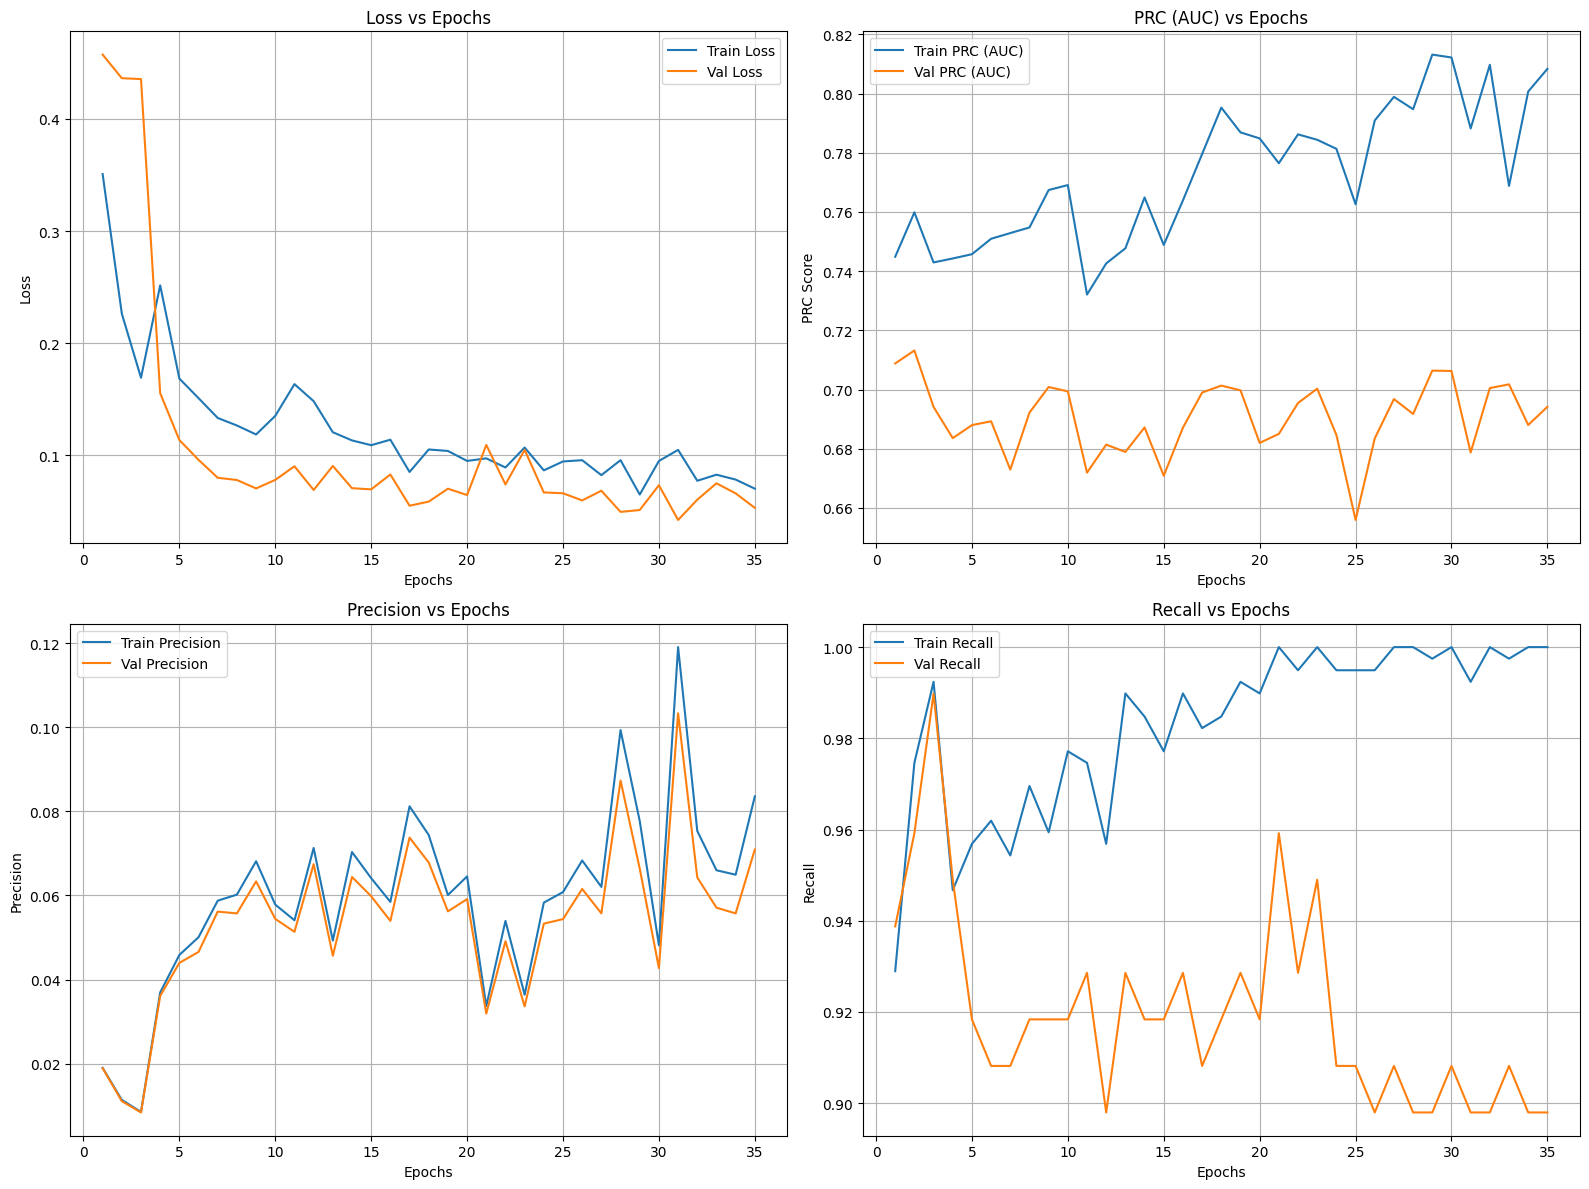

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import precision_score, recall_score, average_precision_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('creditcard.csv')  # Adjust path as needed

# Prepare features and labels
X = df.drop('Class', axis=1).values
y = df['Class'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape to 3D for Conv1D input (samples, timesteps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Compute class weights to handle imbalance
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

# Define 14-layer CNN architecture
model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.2),

    Conv1D(64, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Flatten(),

    Dense(100, activation='relu'),
    Dropout(0.5),

    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Custom callback to compute precision, recall, and PRC (AUC) for both training and validation
class MetricsCallback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.train_precisions = []
        self.train_recalls = []
        self.train_prcs = []
        self.val_precisions = []
        self.val_recalls = []
        self.val_prcs = []

    def on_epoch_end(self, epoch, logs=None):
        # Training metrics
        y_train_pred_probs = self.model.predict(X_train, verbose=0)
        y_train_pred = (y_train_pred_probs > 0.5).astype(int).flatten()
        train_prec = precision_score(y_train, y_train_pred, zero_division=0)
        train_rec = recall_score(y_train, y_train_pred, zero_division=0)
        train_prc = average_precision_score(y_train, y_train_pred_probs)
        self.train_precisions.append(train_prec)
        self.train_recalls.append(train_rec)
        self.train_prcs.append(train_prc)

        # Validation metrics
        y_val_pred_probs = self.model.predict(X_test, verbose=0)
        y_val_pred = (y_val_pred_probs > 0.5).astype(int).flatten()
        val_prec = precision_score(y_test, y_val_pred, zero_division=0)
        val_rec = recall_score(y_test, y_val_pred, zero_division=0)
        val_prc = average_precision_score(y_test, y_val_pred_probs)
        self.val_precisions.append(val_prec)
        self.val_recalls.append(val_rec)
        self.val_prcs.append(val_prc)

metrics_cb = MetricsCallback()

# Train the model for 35 epochs
history = model.fit(
    X_train, y_train,
    epochs=35,
    batch_size=2048,
    validation_data=(X_test, y_test),
    class_weight=class_weights_dict,
    callbacks=[metrics_cb],
    verbose=1
)

# Plotting the graphs
epochs = range(1, 36)

# Plot 1: Loss
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
plt.plot(epochs, history.history['loss'], label='Train Loss')
plt.plot(epochs, history.history['val_loss'], label='Val Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot 2: PRC (AUC)
plt.subplot(2, 2, 2)
plt.plot(epochs, metrics_cb.train_prcs, label='Train PRC (AUC)')
plt.plot(epochs, metrics_cb.val_prcs, label='Val PRC (AUC)')
plt.title('PRC (AUC) vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('PRC Score')
plt.legend()
plt.grid(True)

# Plot 3: Precision
plt.subplot(2, 2, 3)
plt.plot(epochs, metrics_cb.train_precisions, label='Train Precision')
plt.plot(epochs, metrics_cb.val_precisions, label='Val Precision')
plt.title('Precision vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

# Plot 4: Recall
plt.subplot(2, 2, 4)
plt.plot(epochs, metrics_cb.train_recalls, label='Train Recall')
plt.plot(epochs, metrics_cb.val_recalls, label='Val Recall')
plt.title('Recall vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()